In [1]:
using Flux
using Plots
using Statistics

In [2]:
function loss(model, features, labels)
    y_hat = model(features)
    return Flux.mse(y_hat, labels, agg = sum)
end

loss (generic function with 1 method)

In [3]:
function train_model!(f_loss, model, data; learning_rate=0.01)
    Flux.train!(f_loss, model, data, Descent(learning_rate))
end

train_model! (generic function with 1 method)

In [4]:
function train_until_converged!(f_loss, model, data; max_epochs=1000, tolerance=1e-4, learning_rate=0.01)
    x = hcat([d[1] for d in data]...)
    y = hcat([d[2] for d in data]...)
    loss_prev = Inf
    for epoch in 1:max_epochs
        train_model!(f_loss, model, data; learning_rate=learning_rate)
        current_loss = f_loss(model, x, y)
    
        if loss_prev == Inf
            loss_prev = current_loss
            continue
        end 
        if current_loss < 10 && abs(loss_prev - current_loss) < tolerance
            println("Converged at epoch $epoch with loss $current_loss")
            break
        end
        loss_prev = current_loss
    end
end

train_until_converged! (generic function with 1 method)

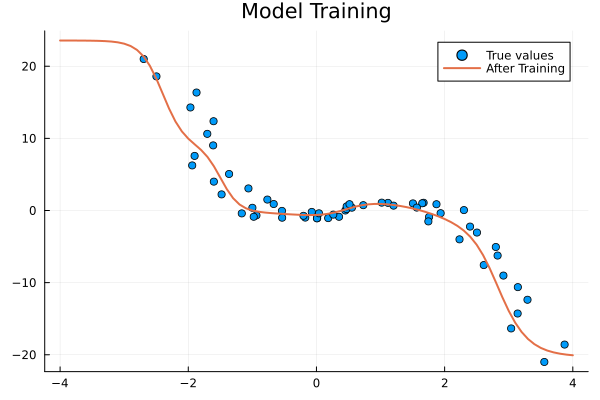

In [5]:
data = [([x + rand(Float32)], 2x-x^3) for x in -3:0.1f0:3]
x = hcat([d[1] for d in data]...)
y = hcat([d[2] for d in data]...)

model = Chain(Dense(1 => 20, σ), Dense(20 => 1))
train_until_converged!(loss, model, data)

plot(vec(x), vec(y), seriestype = :scatter, label="True values", title="Model Training")
plot!(x -> model([x])[1], -4:0.1f0:4, label="After Training", lw=2)

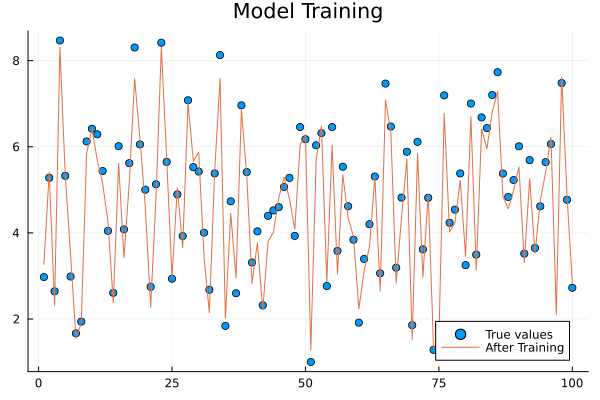

In [6]:
f(x) = 3x[1] + 2x[2] - x[3] + 4x[4] - 2x[5] + 1
        data = []
        for i in 1:100
            xi = [rand(Float32), rand(Float32), rand(Float32), rand(Float32), rand(Float32)]
            yi = f(xi) + rand(Float32)
            push!(data, (xi, yi))
        end
        x = hcat([d[1] for d in data]...)
        y = hcat([d[2] for d in data]...)

        model = Chain(Dense(5 => 20, σ), Dense(20 => 1))
        train_until_converged!(loss, model, data; tolerance=1e-6)

        plot(y[1, :], seriestype = :scatter, label="True values", title="Model Training")
        plot!(model(x)[1, :], label="After Training")